# Decision Tree Classification projet stage 


## Importing the libraries.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import random as python_random

In [29]:
np.random.seed(123)
python_random.seed(123)
tf.random.set_seed(123)

## Importing the dataset for 'Local Refregiration'. 

In [30]:
dataset = pd.read_csv('L_Refreg.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set.

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 11)


In [32]:
print(X_train)

[[ 17   9]
 [ 19   6]
 [ 33   4]
 [ 52   6]
 [ 91   8]
 [ 75   9]
 [ 26   6]
 [115  10]
 [146   8]
 [198   9]
 [ 61  10]
 [ 80   6]
 [ 71   8]
 [ 56   7]
 [102  10]
 [ 55   9]
 [ 89   4]
 [ 49   7]
 [ 94   9]
 [ 62   6]
 [ 54   8]
 [ 37   4]
 [ 48   9]
 [ 15   9]
 [ 49   4]
 [ 96   9]
 [ 47   5]
 [ 64  10]
 [120   8]
 [ 46   9]
 [ 16  10]
 [ 46   9]
 [ 45   5]
 [ 75   5]
 [146   6]
 [ 54   5]
 [ 56   8]
 [ 56   7]
 [ 28  10]
 [ 89   5]
 [ 88   6]
 [ 46   7]
 [ 89   8]
 [ 64   9]
 [ 34   7]
 [ 16   5]
 [100  10]
 [ 82   9]
 [ 54   6]
 [ 46   5]
 [ 78   7]
 [ 65  10]
 [ 46  10]
 [ 48   7]
 [ 83   9]
 [ 89   8]
 [140   8]
 [ 42   9]
 [ 63   9]
 [ 44   9]
 [ 59   4]
 [ 89   6]
 [ 69   5]
 [ 61   9]
 [ 46   4]
 [ 99   9]
 [ 95   7]
 [ 26   3]
 [162  10]
 [ 59   5]
 [ 23   7]
 [ 49   9]
 [101   9]
 [ 56  10]
 [ 46   8]
 [160   5]
 [126   7]
 [ 14   7]
 [ 49   4]
 [ 89   9]
 [ 15  10]
 [ 13   7]
 [ 46   9]
 [ 59  10]
 [133   7]]


In [33]:
print(y_train)

[0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0
 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1
 1 1 1 1 0 1 0 1 0 1 1]


In [34]:
print(X_test)

[[ 46   7]
 [140   8]
 [ 33   8]
 [156   4]
 [ 14   4]
 [134   9]
 [ 46   4]
 [ 46  10]
 [ 35   8]
 [ 49  10]
 [ 89   8]
 [ 89   9]
 [ 45   8]
 [ 46   7]
 [ 72   6]]


In [35]:
print(y_test)

[1 0 1 1 1 0 0 0 1 0 0 1 1 1 1]


## Feature Scaling.

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
print(X_train)

[[-1.35795033  0.7880421 ]
 [-1.30418891 -0.74593298]
 [-0.92785894 -1.76858303]
 [-0.41712541 -0.74593298]
 [ 0.63122237  0.27671707]
 [ 0.20113098  0.7880421 ]
 [-1.11602392 -0.74593298]
 [ 1.27635947  1.29936712]
 [ 2.10966155  0.27671707]
 [ 3.50745858  0.7880421 ]
 [-0.175199    1.29936712]
 [ 0.33553454 -0.74593298]
 [ 0.09360813  0.27671707]
 [-0.30960256 -0.23460795]
 [ 0.92691021  1.29936712]
 [-0.33648327  0.7880421 ]
 [ 0.57746095 -1.76858303]
 [-0.49776754 -0.23460795]
 [ 0.71186451  0.7880421 ]
 [-0.14831828 -0.74593298]
 [-0.36336398  0.27671707]
 [-0.82033609 -1.76858303]
 [-0.52464825  0.7880421 ]
 [-1.41171176  0.7880421 ]
 [-0.49776754 -1.76858303]
 [ 0.76562593  0.7880421 ]
 [-0.55152897 -1.25725801]
 [-0.09455686  1.29936712]
 [ 1.41076303  0.27671707]
 [-0.57840968  0.7880421 ]
 [-1.38483105  1.29936712]
 [-0.57840968  0.7880421 ]
 [-0.60529039 -1.25725801]
 [ 0.20113098 -1.25725801]
 [ 2.10966155 -0.74593298]
 [-0.36336398 -1.25725801]
 [-0.30960256  0.27671707]
 

In [38]:
print(X_test)

[[-0.57840968 -0.23460795]
 [ 1.94837727  0.27671707]
 [-0.92785894  0.27671707]
 [ 2.37846867 -1.76858303]
 [-1.43859247 -1.76858303]
 [ 1.787093    0.7880421 ]
 [-0.57840968 -1.76858303]
 [-0.57840968  1.29936712]
 [-0.87409751  0.27671707]
 [-0.49776754  1.29936712]
 [ 0.57746095  0.27671707]
 [ 0.57746095  0.7880421 ]
 [-0.60529039  0.27671707]
 [-0.57840968 -0.23460795]
 [ 0.12048884 -0.74593298]]


## Training the model.

In [39]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best', max_features = 2 )
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features=2)

## Predicting a new result.

In [40]:
print(classifier.predict(sc.transform([[101,9]])))

[1]


## Predicting the Test set results.

In [41]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]


## Making the Confusion Matrix.

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[5 1]
 [0 9]]


0.9333333333333333

## Visualising the Training set results.

<ipython-input-43-2c666f357c5b>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


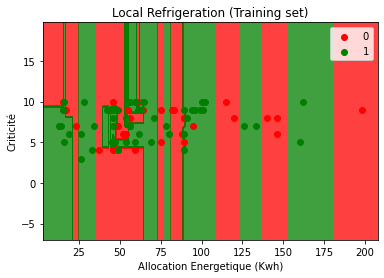

In [43]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Local Refrigeration (Training set)')
plt.xlabel('Allocation Energetique (Kwh)')
plt.ylabel('Criticité')
plt.legend()
plt.show()

## Visualising the Test set results.

<ipython-input-44-baabbbd473ba>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


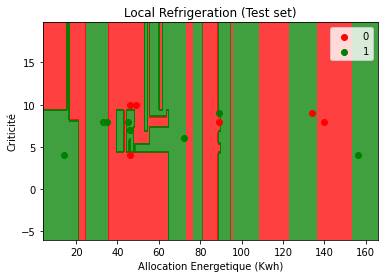

In [44]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 10, stop = X_set[:, 1].max() + 10, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Local Refrigeration (Test set)')
plt.xlabel('Allocation Energetique (Kwh)')
plt.ylabel('Criticité')
plt.legend()
plt.show()